# The political blogosphere and the 2004 U.S. election: divided they blog

Lada A. Adamic, Natalie Glance (2005) The political blogosphere and the 2004 U.S. election: divided they blog. LinkKDD '05: Proceedings of the 3rd international workshop on Link discoveryAugust 2005 Pages 36–43 

https://doi.org/10.1145/1134271.1134277


## ABSTRACT
In this paper, we study the linking patterns and discussion topics of political bloggers. Our aim is to measure the degree of interaction between liberal and conservative blogs, and to uncover any differences in the structure of the two communities. Specifically, we analyze the posts of 40 "A-list" blogs over the period of two months preceding the U.S. Presidential Election of 2004, to study how often they referred to one another and to quantify the overlap in the topics they discussed, both within the liberal and conservative communities, and also across communities. We also study a single day snapshot of over 1,000 political blogs. This snapshot captures blogrolls (the list of links to other blogs frequently found in sidebars), and presents a more static picture of a broader blogosphere. Most significantly, we find differences in the behavior of liberal and conservative blogs, with conservative blogs linking to each other more frequently and in a denser pattern.

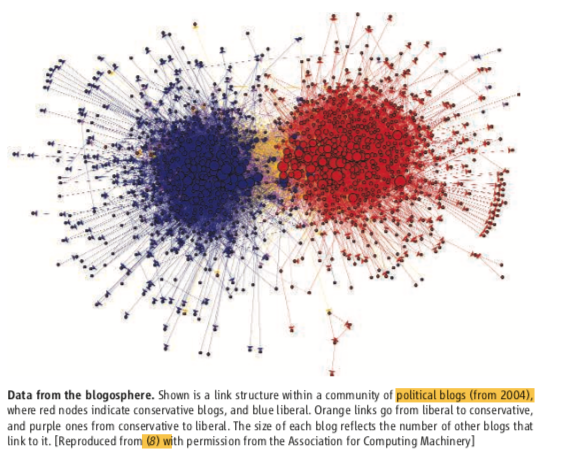

In [1]:
import networkx as nx

http://www-personal.umich.edu/~mejn/netdata/

In [45]:
ls

polblogs.gml                 political_blogosphere.ipynb
polblogs.txt


You should simply add "multigraph 1" to the file header, which allows the graph to have multiple edges and will result in nx.read_gml returning a MultiDiGraph.

https://stackoverflow.com/questions/66434397/duplicate-edges-in-gml-file-using-networkx-read-gml-python

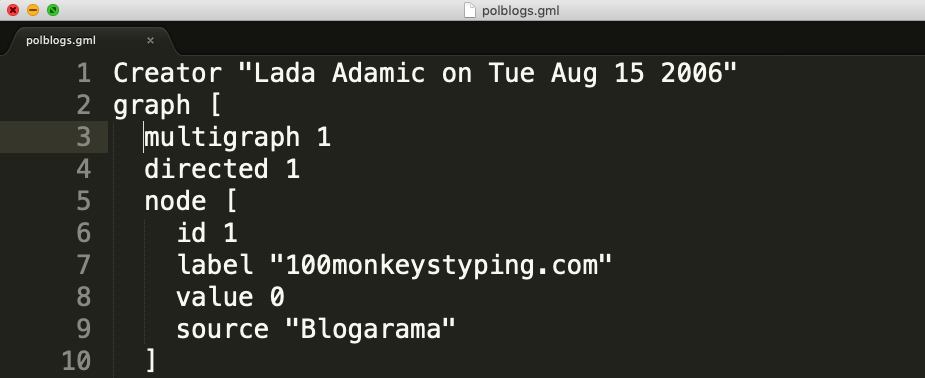

In [35]:
with open('polblogs.gml') as f:
    lines = f.readlines()

In [37]:
lines[:5]

['Creator "Lada Adamic on Tue Aug 15 2006"\n',
 'graph [\n',
 '  multigraph 1\n',
 '  directed 1\n',
 '  node [\n']

In [29]:
bnet = nx.read_gml('polblogs.gml', destringizer=int)

In [38]:
nx.info(bnet)

'MultiDiGraph with 1490 nodes and 19090 edges'

In [44]:
list(bnet.nodes)[:3]

['100monkeystyping.com', '12thharmonic.com/wordpress', '40ozblog.blogspot.com']

In [40]:
type(bnet)

networkx.classes.multidigraph.MultiDiGraph

In [61]:
nodedic = {i: bnet.nodes[i]['value']  for i in bnet.nodes}

Political blogosphere Feb. 2005
Data compiled by Lada Adamic and Natalie Glance

Node "value" attributes indicate political leaning according to:

  0 (left or liberal)
  1 (right or conservative)
  
  
- Red nodes indicate conservative blogs, and blue liberal. 
- Orange links go from liberal to conservative, and purple ones from conservative to liberal. 
- The size of each blog reflects the number of other blogs that link to it.

In [48]:
list(bnet.edges)[:3]

[('100monkeystyping.com', 'rudepundit.blogspot.com', 0),
 ('100monkeystyping.com', 'townhall.com/clog', 0),
 ('100monkeystyping.com', 'tbogg.blogspot.com', 0)]

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx.algorithms.community as nxcom
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [74]:
# def set_node_community(G, communities):
#         '''Add community to node attributes'''
#         for c, v_c in enumerate(communities):
#             for v in v_c:
#                 # Add 1 to save 0 for external edges
#                 G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, e in G.edges:
        if G.nodes[v]['value'] == G.nodes[w]['value']:
            # Internal edge, mark with community
            G.edges[v, w, e]['value'] = 'black'
            # External edge, mark as 2 or 3
        elif G.nodes[v]['value'] > G.nodes[w]['value']:
            G.edges[v, w, e]['value'] = 'purple'
        else:
            G.edges[v, w, e]['value'] = 'orange'
            

def get_color(i):
    if i == 0:
        return 'blue'
    else: 
        return 'red'

In [91]:
node_color = [get_color(bnet.nodes[v]['value']) for v in bnet.nodes]


In [78]:
nx.spring_layout?

In [89]:
pos = nx.spring_layout(bnet, iterations=50, k=0.1,  seed=468)

#pos = nx.spectral_layout(bnet)


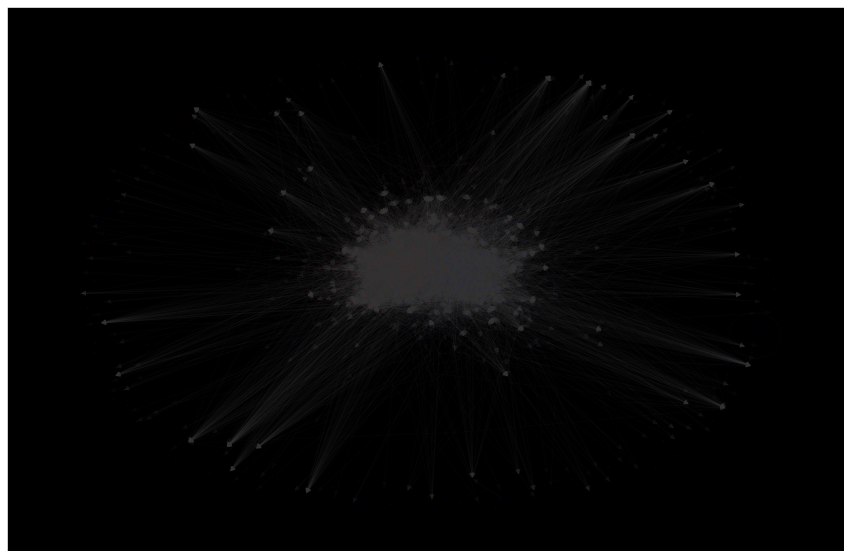

In [92]:
%matplotlib inline
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx( bnet, pos=pos,# node_color=node_color,
                 node_size=1, edge_color="#444444", alpha=0.05, with_labels=False)

In [75]:
set_edge_community(bnet)
# Set community color for internal edges
external1 = [(v, w, e) for v, w, e in bnet.edges if bnet.edges[v, w, e]['value'] == 'purple']
external2 = [(v, w, e) for v, w, e in bnet.edges if bnet.edges[v, w, e]['value'] == 'orange']
internal = [(v, w, e) for v, w, e in bnet.edges if bnet.edges[v, w, e]['value']=='black']
internal_color = ["black" for e in internal]
external_color1 = ["purple" for e in external1]
external_color2 = ["orange" for e in external2]


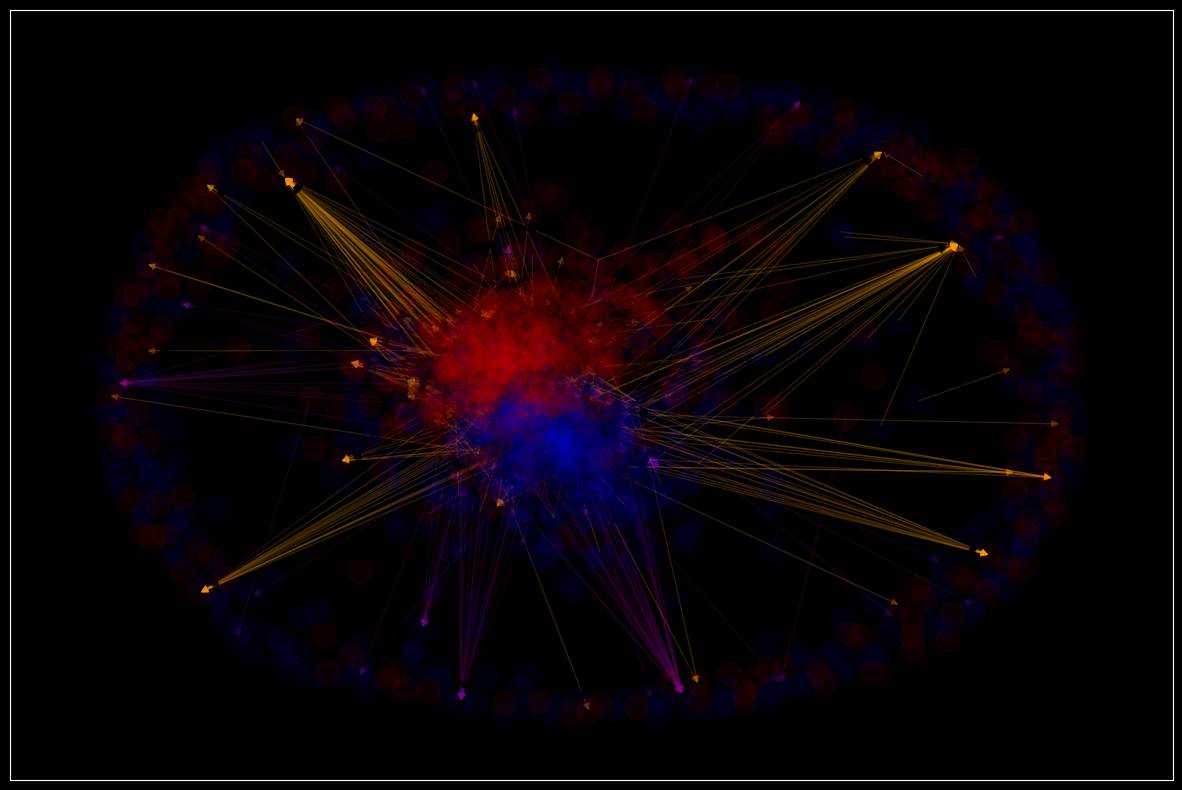

In [76]:
# PLOT
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
#plt.style.use('dark_background')

# Set node and edge communities
# set_node_community(G_social, communities)



# external edges 1
nx.draw_networkx(
    bnet, 
    pos=pos, 
    node_size=0, 
    edgelist=external1, 
    edge_color="purple",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# external edges 2
nx.draw_networkx(
    bnet, 
    pos=pos, 
    node_size=0, 
    edgelist=external2, 
    edge_color="orange",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    bnet, 
    pos=pos, 
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

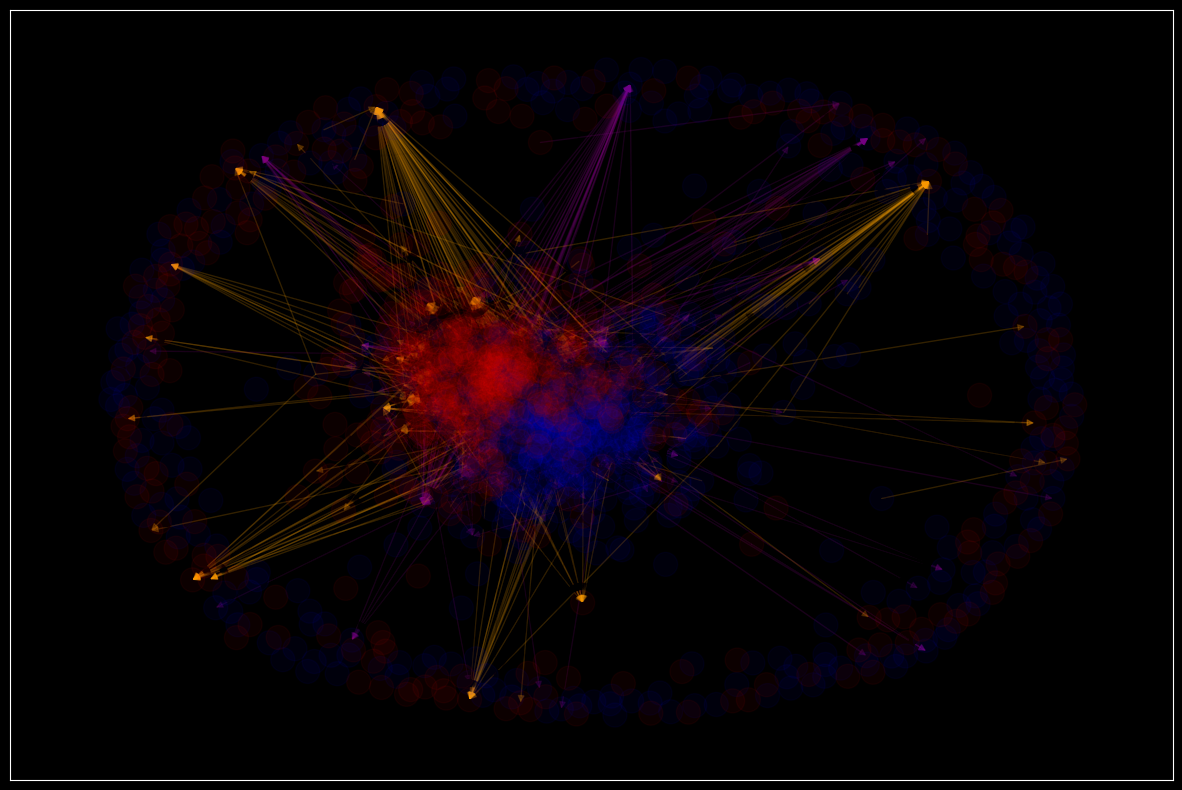

In [88]:
# PLOT
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
#plt.style.use('dark_background')

# Set node and edge communities
# set_node_community(G_social, communities)



# external edges 1
nx.draw_networkx(
    bnet, 
    pos=pos, 
    node_size=0, 
    edgelist=external1, 
    edge_color="purple",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# external edges 2
nx.draw_networkx(
    bnet, 
    pos=pos, 
    node_size=0, 
    edgelist=external2, 
    edge_color="orange",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    bnet, 
    pos=pos, 
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

# 使用Gephi的可视化结果
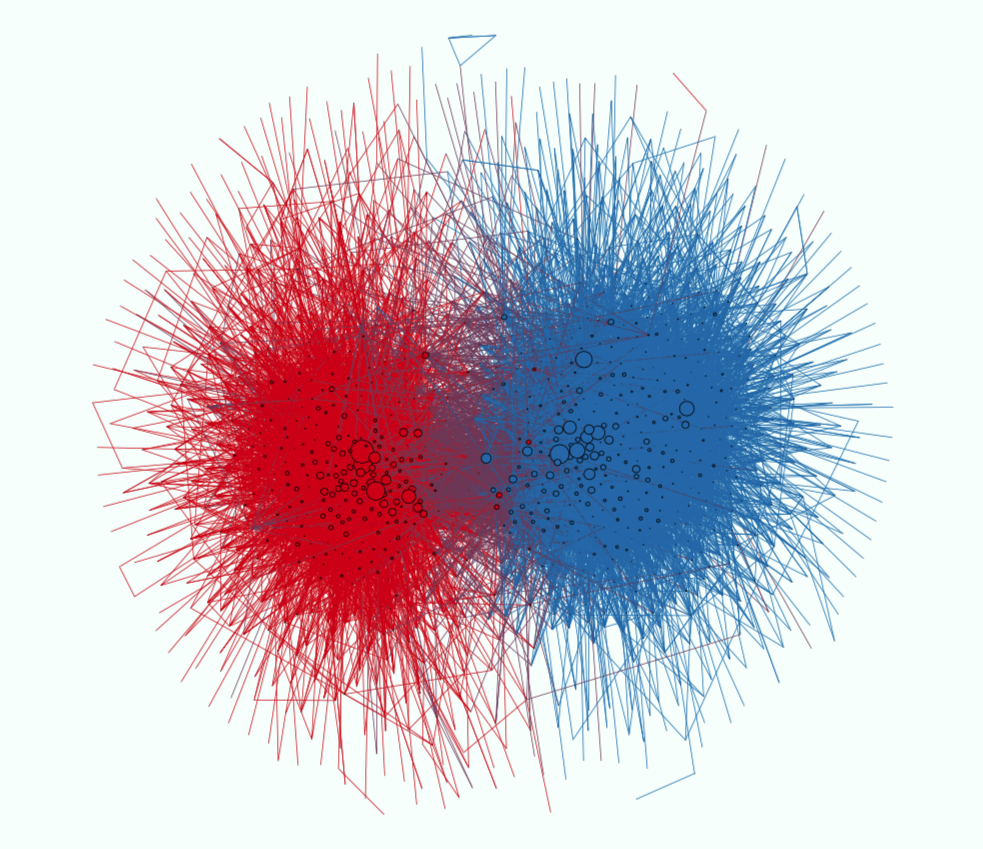